<a href="https://colab.research.google.com/github/hbisgin/DeepLearning/blob/main/DL_5_IntroTensors_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import pandas as pd

In [5]:
import torch
path = '../Data/'

In [5]:
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2,],
                             [3, 4,],
                             [5, 6,],
                             [7, 8,]])
#You don't have to format it like I did, thats just for clarity
torch_tensor3d = torch.tensor([
                            [
                            [ 1,  2,  3],
                            [ 4,  5,  6],
                            ],
                            [
                            [ 7,  8,  9],
                            [10, 11, 12],
                            ],
                            [
                            [13, 14, 15],
                            [16, 17, 18],
                            ],
                            [
                            [19, 20, 21],
                            [22, 23, 24],
                            ]
                              ])

In [6]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([4, 2])
torch.Size([4, 2, 3])


In [7]:
x_np = np.random.random((4,4))
print(x_np)

[[0.53545286 0.60947375 0.70687826 0.15906052]
 [0.04534611 0.80431605 0.64069679 0.55951093]
 [0.96230358 0.55762799 0.17892905 0.70240553]
 [0.72642587 0.91455295 0.02422817 0.6708366 ]]


In [8]:
x_pt = torch.tensor(x_np)
print(x_pt)

tensor([[0.5355, 0.6095, 0.7069, 0.1591],
        [0.0453, 0.8043, 0.6407, 0.5595],
        [0.9623, 0.5576, 0.1789, 0.7024],
        [0.7264, 0.9146, 0.0242, 0.6708]], dtype=torch.float64)


In [11]:
print(x_np.dtype, x_pt.dtype)

float64 torch.float64


In [12]:
#Lets force them to be 32-bit floats
x_np = np.asarray(x_np, dtype=np.float32)
x_pt = torch.tensor(x_np, dtype=torch.float32)
print(x_np.dtype, x_pt.dtype)

float32 torch.float32


#Masking/Filtering

In [ ]:
b_np = (x_np > 0.5)
print(b_np)
print(b_np.dtype)

[[False  True False  True]
 [ True  True False  True]
 [False False  True False]
 [ True False False  True]]
bool


In [ ]:
b_pt = (x_pt > 0.5)
print(b_pt)
print(b_pt.dtype)

tensor([[False,  True, False,  True],
        [ True,  True, False,  True],
        [False, False,  True, False],
        [ True, False, False,  True]])
torch.bool


In [ ]:
np.sum(x_np)

np.float32(8.01852)

In [ ]:
torch.sum(x_pt)

tensor(8.0185)

#Transpose

In [ ]:
np.transpose(x_np)

array([[0.16266039, 0.5539646 , 0.27974755, 0.75411797],
       [0.9451285 , 0.673569  , 0.09722286, 0.38290146],
       [0.40352678, 0.16084701, 0.7870128 , 0.1084967 ],
       [0.9045233 , 0.5248544 , 0.32643124, 0.95351535]], dtype=float32)

In [ ]:
#torch.transpose(input, dim0, dim1)
#please note that we are changin rows and columns, which are represented
#by 0 and 1 respectively
torch.transpose(x_pt, 0, 1)



tensor([[0.1627, 0.5540, 0.2797, 0.7541],
        [0.9451, 0.6736, 0.0972, 0.3829],
        [0.4035, 0.1608, 0.7870, 0.1085],
        [0.9045, 0.5249, 0.3264, 0.9535]])

In [17]:
print(torch.transpose(torch_tensor3d, 0, 2).shape)
print(torch.cuda.is_available())
print(torch.backends.mps.is_available())

torch.Size([3, 2, 4])
False
True


#Minimal CUDA check + tensor move

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.randn(3, 2)   # CPU tensor by default
x = x.to(device) #please make sure you assign your variable again.

print("Device:", device)
print("Tensor device:", x.device)


Device: cpu
Tensor device: cpu


In [25]:
import timeit
x = torch.rand(2**11, 2**11)
time_cpu = timeit.timeit("x@x", globals=globals(), number=100)

In [20]:
print(time_cpu)

6.0628481509920675


In [21]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : False


In [26]:
x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=100)
print(time_gpu)

6.952741090004565


In [27]:
def moveTo(obj, device):
    """
    obj: the python object to move to a device, or to move its contents to a device
    device: the compute device to move objects to
    """
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        return obj.to(device)
    else:
        return obj

some_tensors = [torch.tensor(1), torch.tensor(2)]
print(some_tensors)
print(moveTo(some_tensors, device))

[tensor(1), tensor(2)]
[tensor(1), tensor(2)]


In [52]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()              # or X.values
y = y.astype(int).to_numpy()
print(X.shape)

(70000, 784)


In [53]:
class SimpleDataset(Dataset):

    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = X
        self.y = y

    def __getitem__(self, index):
        #This "work" could have gone in the constructor, but you should get into
        inputs = torch.tensor(self.X[index,:], dtype=torch.float32)
        targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
        return inputs, targets

    def __len__(self):
        return self.X.shape[0]
#Now we can make a PyTorch dataset
dataset = SimpleDataset(X, y)

In [54]:
dataset.X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
dataset.y

array([5, 0, 4, ..., 4, 5, 6])

In [56]:
print("Length: ", len(dataset))
example, label = dataset[0]
print("Features: ", example.shape) #Will return 784
print("Label of index 0: ", label)

Length:  70000
Features:  torch.Size([784])
Label of index 0:  tensor(5)


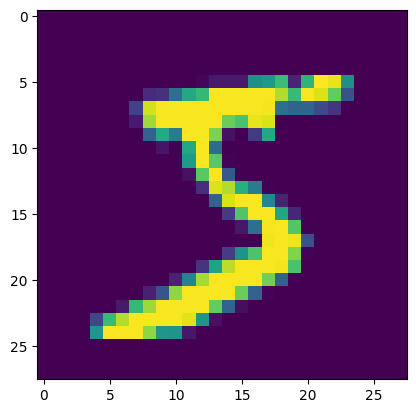

In [57]:
plt.imshow(example.reshape((28,28)))

In [58]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print("{} examples for training and {} for testing".format(len(train_dataset), len(test_dataset)))

56000 examples for training and 14000 for testing


#By looking at the SimpleDataset class, write a new Dataset subclass which can take a csv file and return data and labels separately for a given index

You can take this example where you read iris_num.csv file and it splits data and label parts of your dataframe, and get values which then turned into tensors.

Your __getitem__ should take an index and return specific row and label for a given index

In [59]:
# df = pd.read_csv("/content/drive/MyDrive/DATA/iris_num.csv")
import os
filename = os.path.join(path, 'iris_num.csv')
df = pd.read_csv(filename)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
#you can code here
import os
import pandas as pd
from torch.utils.data import Dataset
import torch
DATA_PATH = '../Data/'

class csvDataset(Dataset):

    def __init__(self,filename):
        super(csvDataset, self).__init__()
        self.filename = filename
        df = pd.read_csv(self.filename)
        self.X = df.iloc[:, :-1].to_numpy()
        self.y = df.iloc[:, -1].to_numpy()

    def __getitem__(self, index):
        #This "work" could have gone in the constructor, but you should get into
        inputs = torch.tensor(self.X[index,:], dtype=torch.float32)
        targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
        return inputs, targets

    def __len__(self):
        return self.X.shape[0]

Once you are done with your class, it should work for the lines below.

In [8]:
# iris=csvDataset("/content/drive/MyDrive/DATA/iris_num.csv")

In [9]:
filename = os.path.join(DATA_PATH, 'iris_num.csv')
iris=csvDataset(filename)

In [10]:
row, label = iris[0]

print(row, label)

tensor([5.1000, 3.5000, 1.4000, 0.2000]) tensor(0)
